# **INTRODUCTION**

Hello all!!!

Hope y'all are doing good ;)

Here, I've done exploratory data analysis for the AirBnb Dataset from Kaggle.

I've included histograms and interective maps also!. Hope y'all like this notebook. 

If you like this notebook, feel free to upvote this ;)

Happy Learning <3

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv
/kaggle/input/new-york-city-airbnb-open-data/New_York_City_.png


# **IMPORTING REQUIRED LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

# **EXPLORING THE DATASET**

In [3]:
dataset = pd.read_csv("/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv")

In [4]:
dataset.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [5]:
dataset.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [7]:
dataset.shape

(48895, 16)

In [8]:
dataset.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [9]:
dataset['reviews_per_month'].fillna(value = 0 , inplace = True)
dataset.drop(['id' , 'host_id' , 'host_name' ,'last_review'] , axis = 1 , inplace = True)
dataset.head()

,name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Clean & quiet apt home by the park,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Skylit Midtown Castle,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,THE VILLAGE OF HARLEM....NEW YORK !,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,Cozy Entire Floor of Brownstone,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Entire Apt: Spacious Studio/Loft by central park,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


# **EDA**

**The most present neighbourhood group**

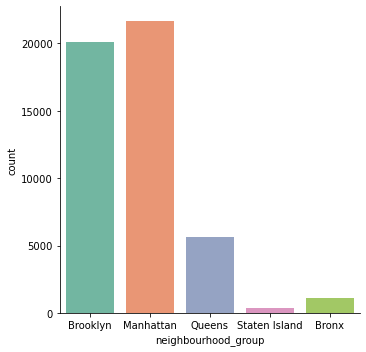

In [10]:
sns.catplot(x="neighbourhood_group", kind = "count", palette = "Set2", data = dataset)
plt.show()

From the graph, Manhattan is the most frequent group in this dataset.

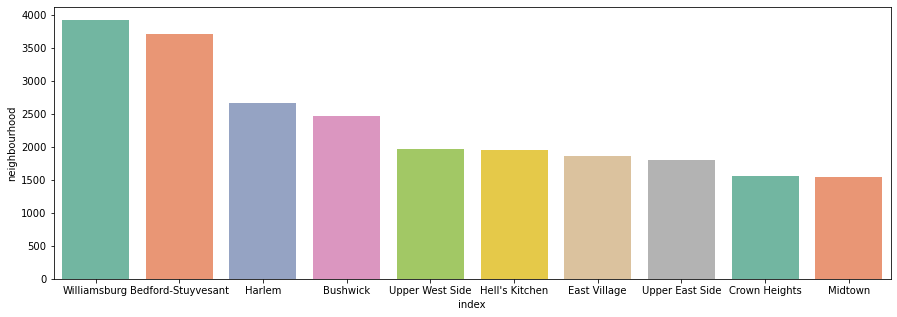

In [11]:
neighbourhood_top10 = dataset["neighbourhood"].value_counts().head(10)
df_neighbourhood_top10 = pd.DataFrame(neighbourhood_top10)
df_neighbourhood_top10 = df_neighbourhood_top10.reset_index()
f, ax = plt.subplots(figsize = (15,5))
sns.barplot(x ="index", y = "neighbourhood", palette = "Set2", data = df_neighbourhood_top10)
plt.show()

So the most frequent neighbourhood is Williamsburg, followed by Bedford-Stuyvesant.

**Checking the most expensive room type by it's median**

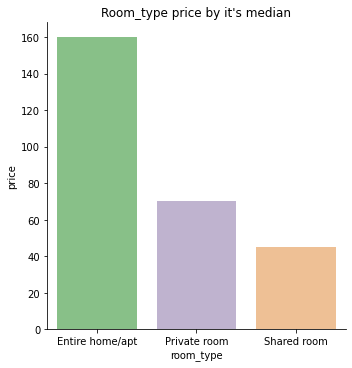

In [12]:
dataset_price = dataset.groupby(["room_type"])["price"].median()
df_dataset_price = pd.DataFrame(dataset_price)
df_dataset_price = df_dataset_price.reset_index()

sns.catplot(x="room_type", y="price", kind = "bar", palette = "Accent",  data = df_dataset_price)
plt.title("Room_type price by it's median")
plt.show()

As we can see the Entire Home is the most expensive room type, followed by Private Room, and Shared room.

**Checking the number of reviews for each neighbourhood group**

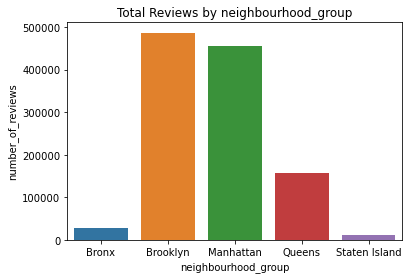

In [13]:
dataset_reviews = dataset.groupby(["neighbourhood_group"])["number_of_reviews"].sum()
df_dataset_reviews = pd.DataFrame(dataset_reviews)
df_dataset_reviews = df_dataset_reviews.reset_index()

sns.barplot(x="neighbourhood_group", y="number_of_reviews", data = df_dataset_reviews)
plt.title("Total Reviews by neighbourhood_group")
plt.show()

**Checking the minimum night mean for each neighbourhood group**

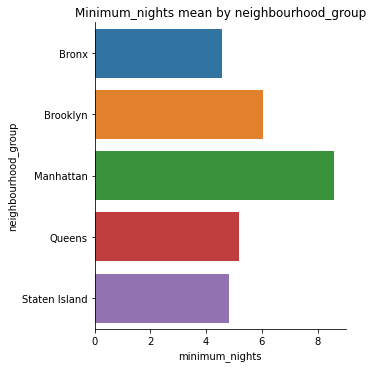

In [14]:
dataset_night = dataset.groupby(["neighbourhood_group"])["minimum_nights"].mean().round(2)
df_dataset_night = pd.DataFrame(dataset_night)
df_dataset_night = df_dataset_night.reset_index()

sns.catplot(x="minimum_nights", y = "neighbourhood_group", kind = "bar", data = df_dataset_night)
plt.title("Minimum_nights mean by neighbourhood_group")
plt.show()

Manhattan has the highest mean of the neighbourhood groups.

**Checking the proportion of "private_room", "entire apt" and "shared room" for each "neighbourhood_group"**

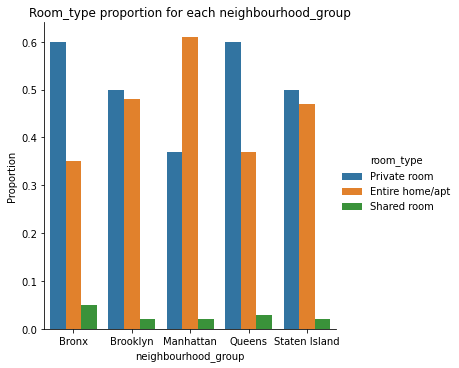

In [15]:
dataset_proportion = dataset.groupby(["neighbourhood_group"])["room_type"].value_counts()
df_dataset_proportion = pd.DataFrame(dataset_proportion)
df_dataset_proportion.rename(columns={"room_type":"Total of values"}, inplace = True)


dataset_count = dataset.groupby(["neighbourhood_group"])["room_type"].count()
df_dataset_count = pd.DataFrame(dataset_count)


df_dataset_proportion["Total"] = 0

df_dataset_proportion.loc["Bronx"]["Total"]= df_dataset_count.room_type.loc["Bronx"]
df_dataset_proportion.loc["Brooklyn"]["Total"]= df_dataset_count.room_type.loc["Brooklyn"]
df_dataset_proportion.loc["Manhattan"]["Total"]= df_dataset_count.room_type.loc["Manhattan"]
df_dataset_proportion.loc["Queens"]["Total"]= df_dataset_count.room_type.loc["Queens"]
df_dataset_proportion.loc["Staten Island"]["Total"]= df_dataset_count.room_type.loc["Staten Island"]

df_dataset_proportion = df_dataset_proportion.reset_index()

df_dataset_proportion["Proportion"] = (df_dataset_proportion["Total of values"]/df_dataset_proportion["Total"]).round(2)

sns.catplot(x="neighbourhood_group",
            y = "Proportion",
            kind = "bar",
            hue = "room_type",
            data = df_dataset_proportion)
plt.title("Room_type proportion for each neighbourhood_group")
plt.show()

**Plotting the latitude and longitude on a relplot to help us visualize the neighbourhood group distribuition**

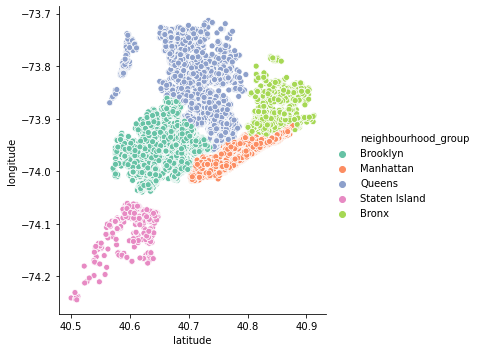

In [16]:
sns.relplot(x="latitude", y="longitude", palette = "Set2", hue = "neighbourhood_group", data = dataset)
plt.show()

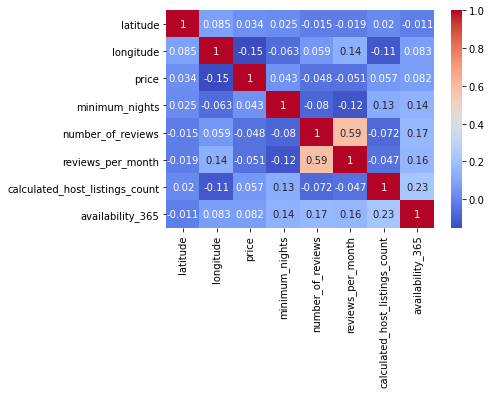

In [17]:
corr = dataset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

**Geographical Visualization**

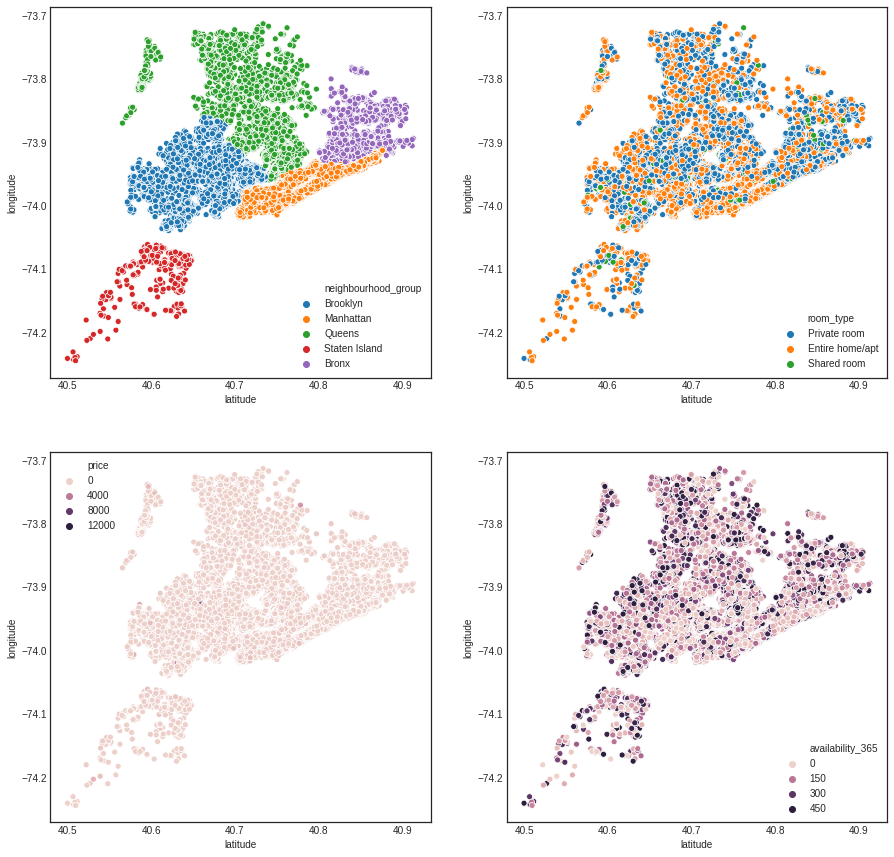

In [18]:
plt.figure(figsize = (15, 15))
plt.style.use('seaborn-white')
plt.subplot(221)
sns.scatterplot(x="latitude", y="longitude",hue="neighbourhood_group", data=dataset)
plt.subplot(222)
sns.scatterplot(x="latitude", y="longitude",hue="room_type", data=dataset)
plt.subplot(223)
sns.scatterplot(x="latitude", y="longitude",hue="price", data=dataset)
plt.subplot(224)
sns.scatterplot(x="latitude", y="longitude",hue="availability_365", data=dataset)
plt.show()

In [19]:
import pandas as pd
import geopandas as gpd
import math
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
m_1 = folium.Map(location=[40.7128,-74.0060], tiles='cartodbpositron', zoom_start=12)

# Adding a heatmap to the base map
HeatMap(data=dataset[['latitude', 'longitude']], radius=10).add_to(m_1)

# Displaying the map
m_1